# Exploratory Analysis

In [ ]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

In [ ]:
from olist.data import Olist
data = Olist().get_data()

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- to a `seller_id`...
- and leaves a `review_id`...
- all this belonging to an `order_id`

## 1 - Run an automated exploratory analysis with [ydata-profiling](https://github.com/ydataai/ydata-profiling)

In [ ]:
# First, let's install the ydata-profiling package
! pip install --quiet pandas==1.4.4 ydata_profiling==4.2.0 Pillow==9.2.0

In [ ]:
# Then create a "reports" directory
!mkdir reports

In [ ]:
# let's import ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport
# choose which datasets to profile
datasets_to_profile = ['orders', 'products', 'sellers',
                  'customers', 'order_reviews',
                  'order_items']

👉 Create and save one `html report` per dataset to profile 

⏳ (It usually takes a few minutes)

In [ ]:
for d in datasets_to_profile:
    print('exporting: '+ d)
    profile = ProfileReport(data[d], title = d)
    profile.to_file(f"reports/{d}_report.html")

## 2 - Investigate the cardinalities of your various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customer` is there ?**  
(You can use ydata-profiling or pandas methods on your notebook if you prefer)

In [ ]:
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nunique', 'count','ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


❓ **How many reviews is there per order? Do we have reviews for all orders ?**
<details>
    <summary markdown='span'>Hints</summary>

This info is not directly accessible in your individual csv. You'll need to proceed to merge
</details>

In [ ]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]
items = data['order_items'][['order_id', 'product_id','seller_id']]

In [ ]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(2)

,customer_id,order_id,review_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5


In [ ]:
# Check missing reviews?
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

☝️ Nearly all orders have a review, except 768 out of 100k (less than 0.7% missing)

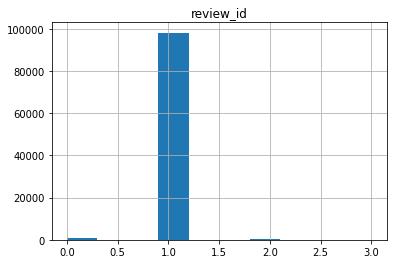

In [ ]:
# We need to add the following magic command to make sure the plot displays correctly!
%matplotlib inline

# Check for max number of reviews per order
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

☝️ Nearly all orders have only one review per customer. We are safe!

🧪 **Test your code below**

Store the number of orders with missing reviews as `int` in a variable named `n_missing_reviews`

In [ ]:
n_missing_reviews = orders_reviews.isna().sum()['review_id']

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bruncky/.pyenv/versions/data-maintenance/bin/python3
cachedir: .pytest_cache
rootdir: /home/bruncky/code/lewagon-dev/Data Content/data-solutions/04-Decision-Science/01-Project-Setup/03-Exploratory-Analysis
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master
